<a href="https://colab.research.google.com/github/nicolas-pilorge/portfolio/blob/main/TpFinalGrupoI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle
!mkdir ~/.kaggle

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!cp /content/drive/MyDrive/Colab\ Notebooks/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d teejmahal20/airline-passenger-satisfaction
!unzip airline-passenger-satisfaction.zip

Dataset URL: https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction
License(s): other
  0% 0.00/2.71M [00:00<?, ?B/s]
100% 2.71M/2.71M [00:00<00:00, 1.05GB/s]
Archive:  airline-passenger-satisfaction.zip
  inflating: test.csv                
  inflating: train.csv               


## Análisis EDA

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('train.csv')

In [6]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [7]:
print(f'\nNumero de filas: {df.shape[0]}')
print(f'\nNumero de columnas: {df.shape[1]}')


Numero de filas: 103904

Numero de columnas: 25


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [9]:
print(f'\nVariables numericas')
df.describe()


Variables numericas


,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [10]:
print(f'\nVariables categoricas')
df.describe(include='object')


Variables categoricas


,Gender,Customer Type,Type of Travel,Class,satisfaction
count,103904,103904,103904,103904,103904
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,52727,84923,71655,49665,58879


## Limpieza de datos

In [11]:
print(f'\nValores nulos: \n{df.isnull().sum()}')


Valores nulos: 
Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310

In [12]:
#Reemplazo los valores faltantes con la mediana
median_delay = df['Arrival Delay in Minutes'].median()
df['Arrival Delay in Minutes'].fillna(median_delay, inplace=True)

/tmp/ipython-input-4222652211.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Arrival Delay in Minutes'].fillna(median_delay, inplace=True)


In [13]:
print(f'\nValores nulos: \n{df.isnull().sum()}')


Valores nulos: 
Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: i

In [14]:
#Quito columnas que no aportan
columnas_eliminar = ['Unnamed: 0', 'id']
df.drop(columns=columnas_eliminar, inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

In [16]:
print(f"\nNúmero de filas duplicadas: {df.duplicated().sum()}")


Número de filas duplicadas: 0


## Análisis variables categoricas


--- Análisis de la columna: 'Gender' ---
Gender
Female    52727
Male      51177
Name: count, dtype: int64


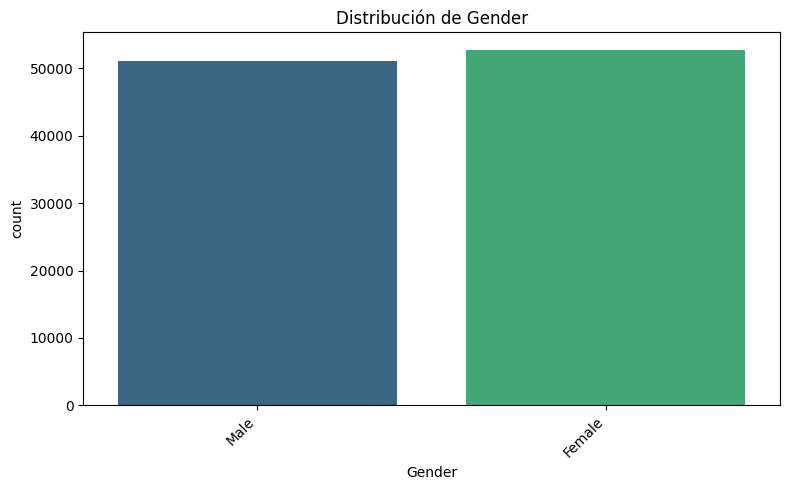


--- Análisis de la columna: 'Customer Type' ---
Customer Type
Loyal Customer       84923
disloyal Customer    18981
Name: count, dtype: int64


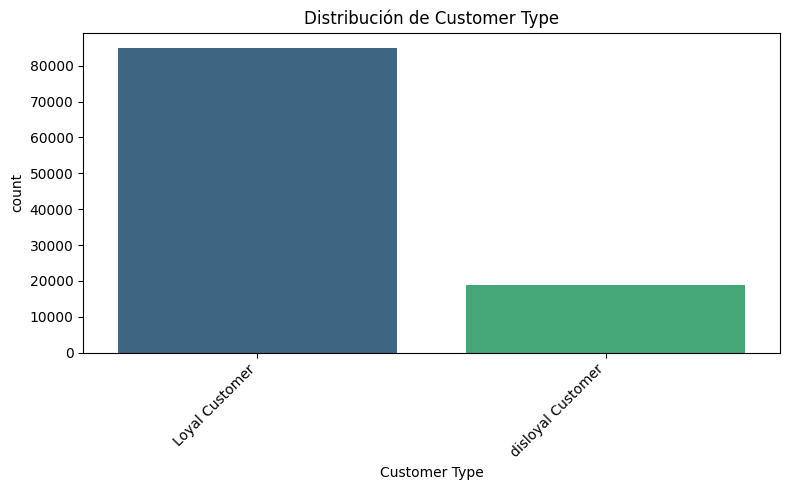


--- Análisis de la columna: 'Type of Travel' ---
Type of Travel
Business travel    71655
Personal Travel    32249
Name: count, dtype: int64


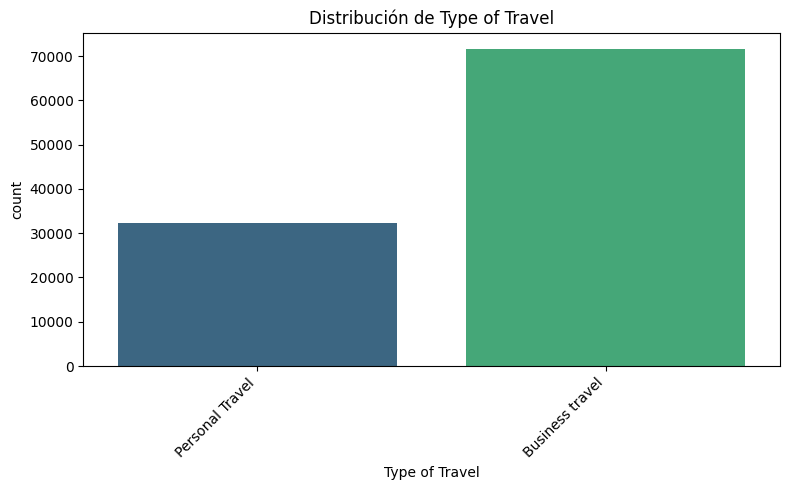


--- Análisis de la columna: 'Class' ---
Class
Business    49665
Eco         46745
Eco Plus     7494
Name: count, dtype: int64


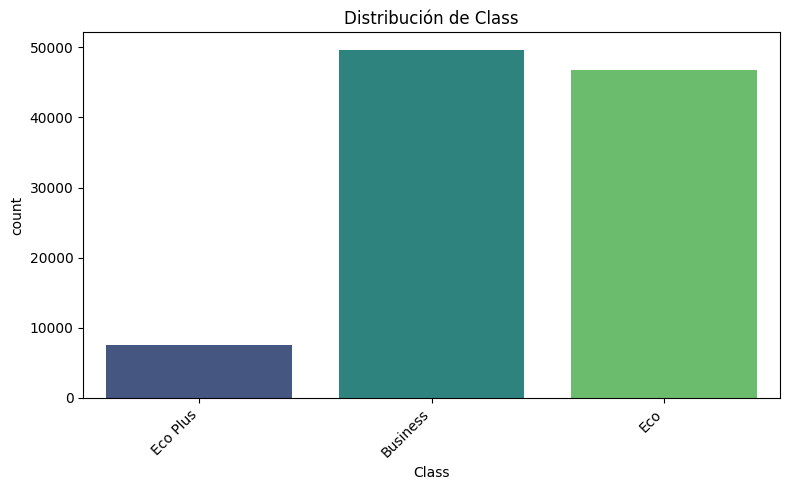


--- Análisis de la columna: 'satisfaction' ---
satisfaction
neutral or dissatisfied    58879
satisfied                  45025
Name: count, dtype: int64


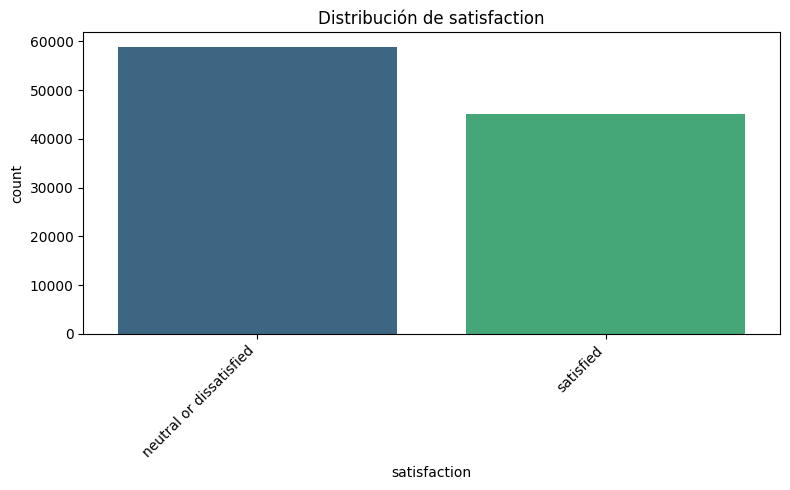

In [17]:
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    print(f"\n--- Análisis de la columna: '{col}' ---")
    print(df[col].value_counts())

    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, data=df, hue=col, palette='viridis')
    plt.title(f'Distribución de {col}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

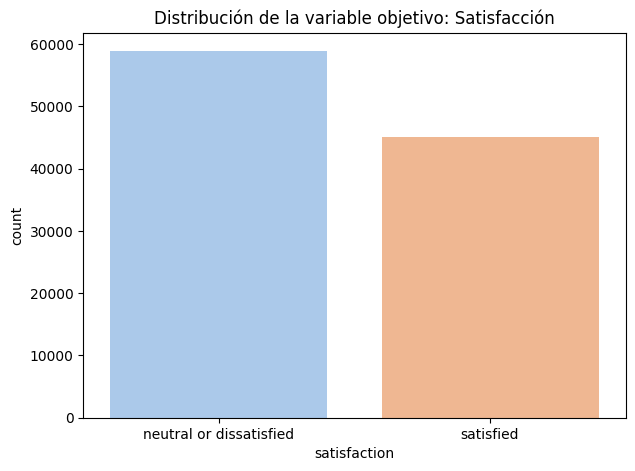

In [18]:
# Análisis de la variable objetivo 'satisfaction'
plt.figure(figsize=(7, 5))
sns.countplot(x='satisfaction', data=df, hue='satisfaction', palette='pastel')
plt.title('Distribución de la variable objetivo: Satisfacción')
plt.show()

## Análisis variables numericas

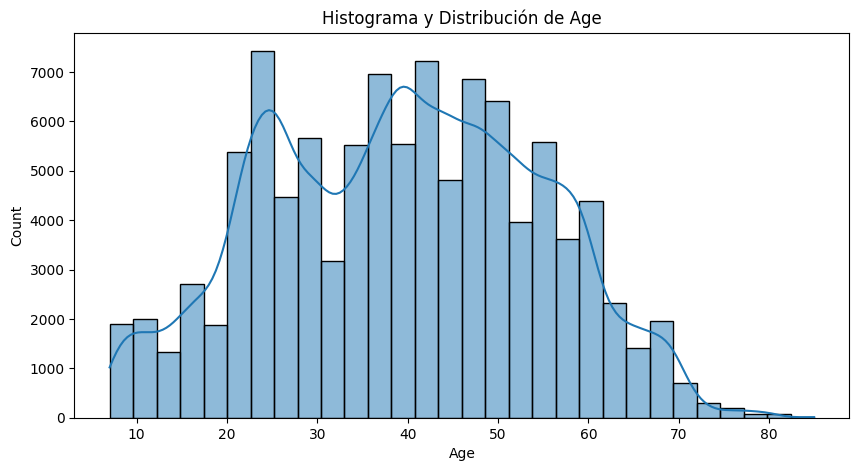

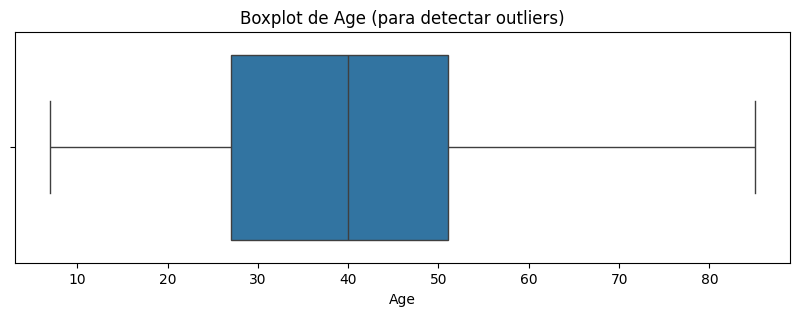

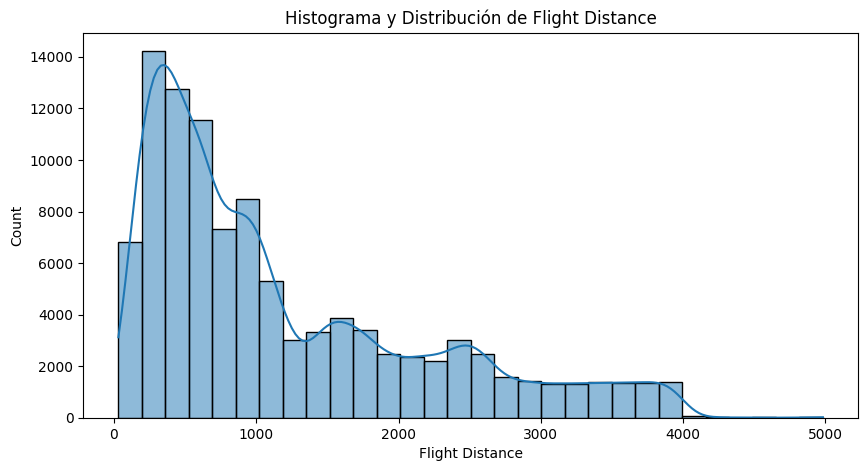

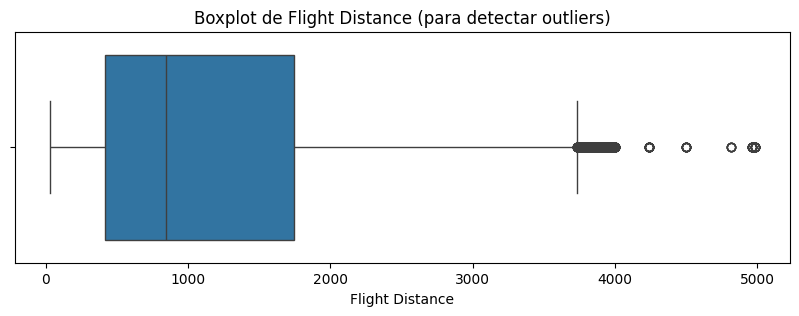

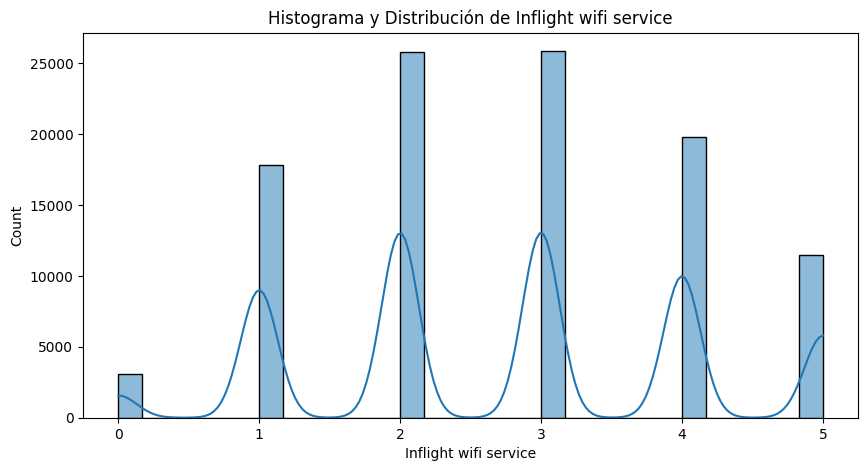

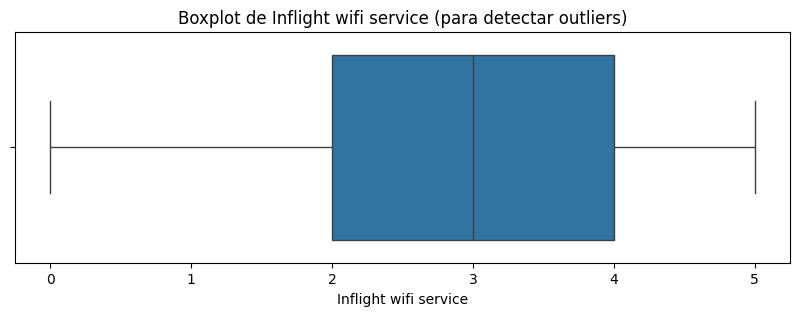

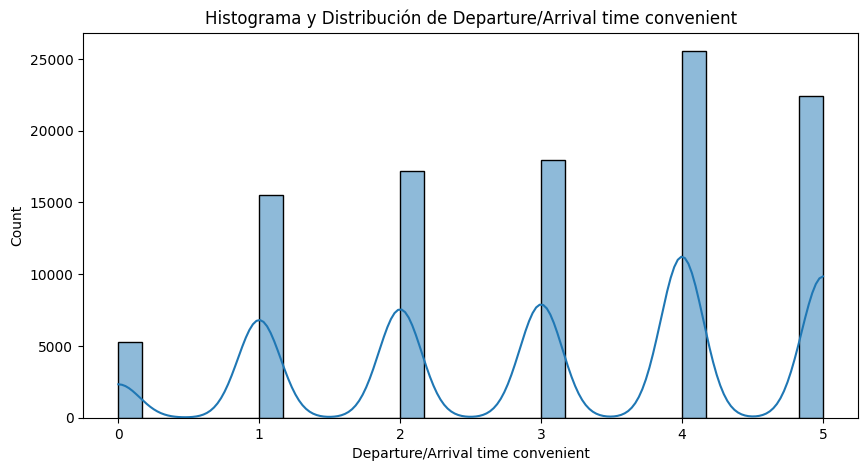

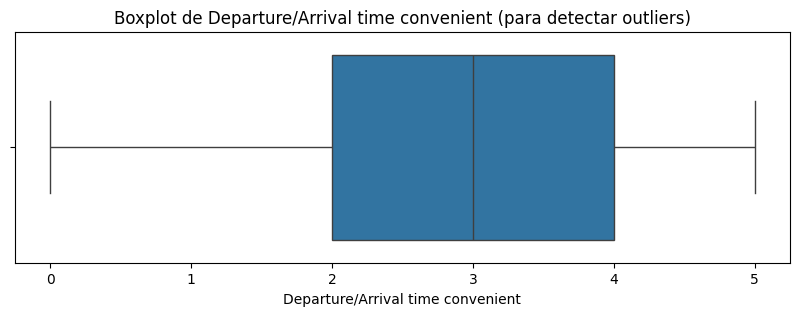

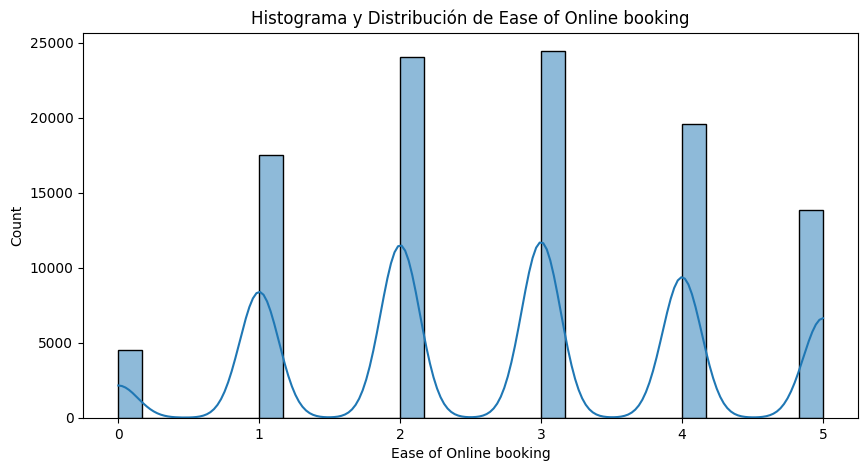

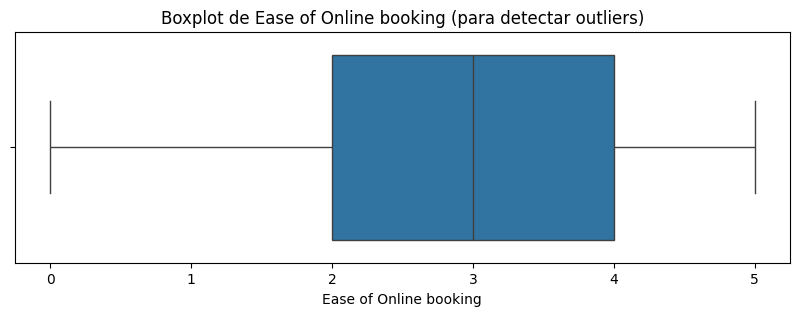

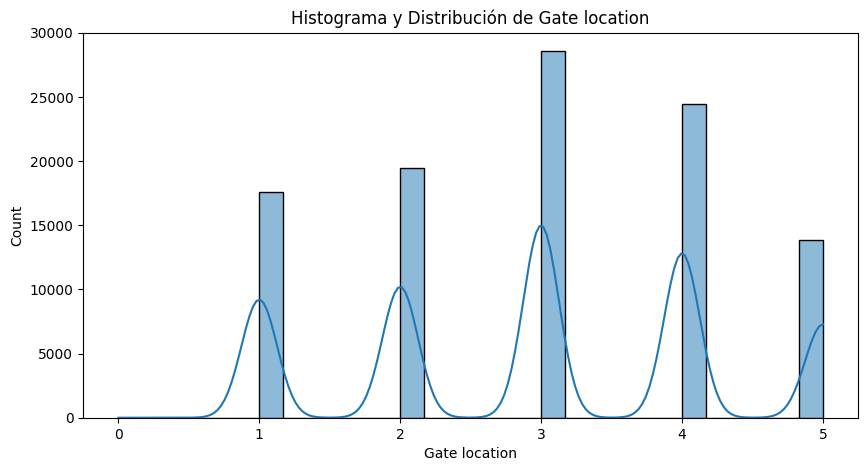

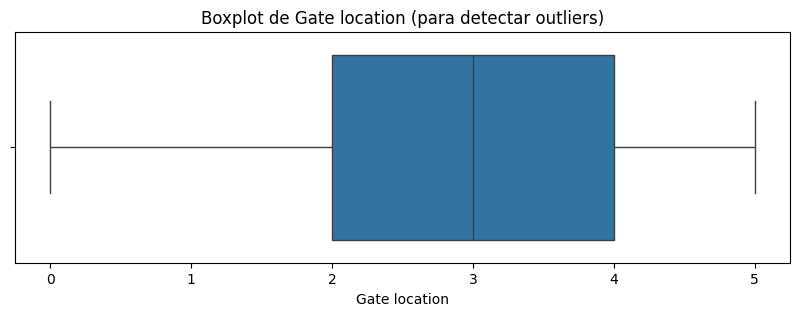

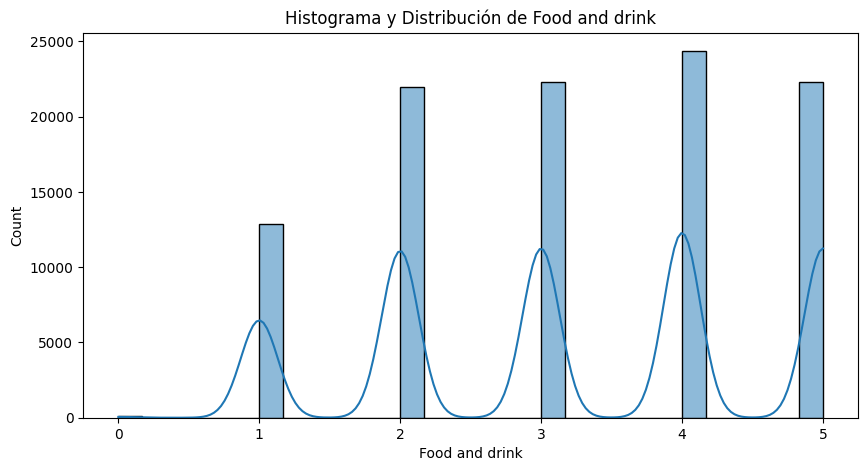

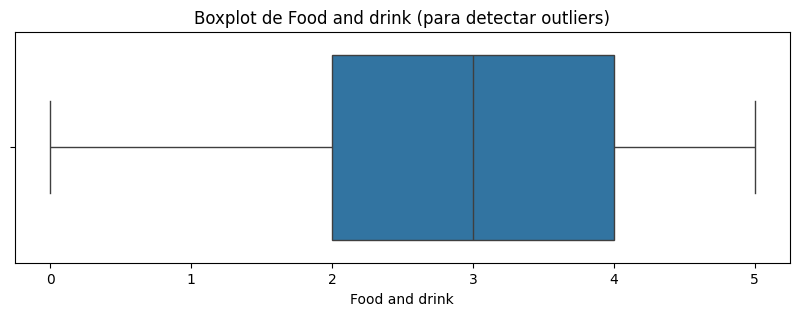

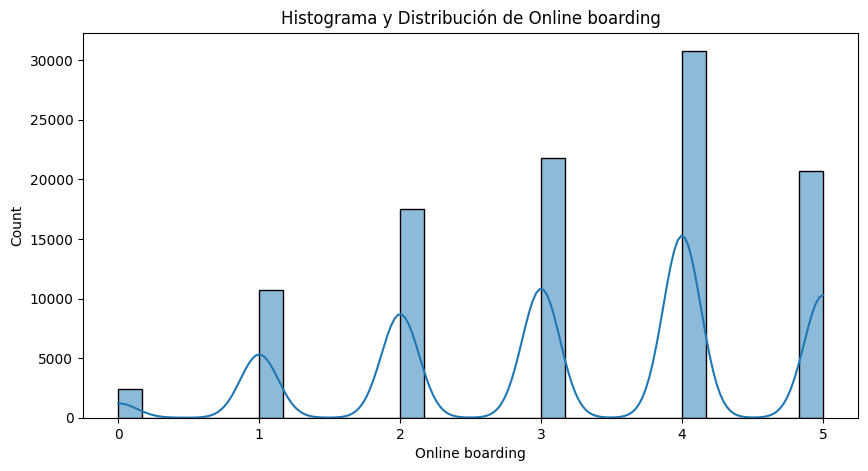

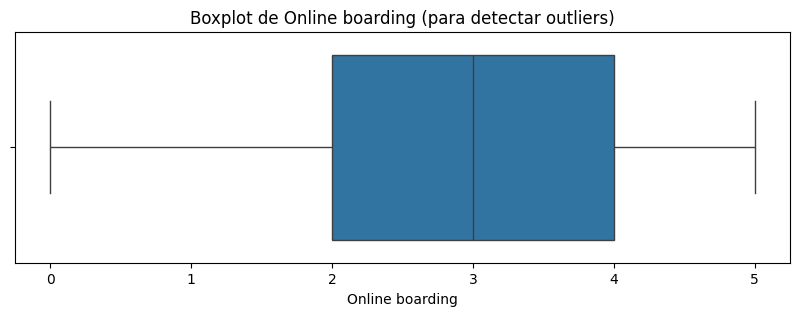

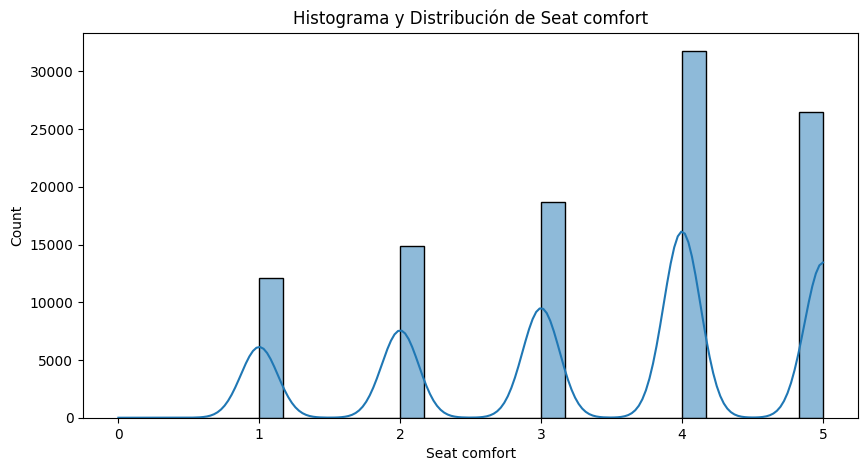

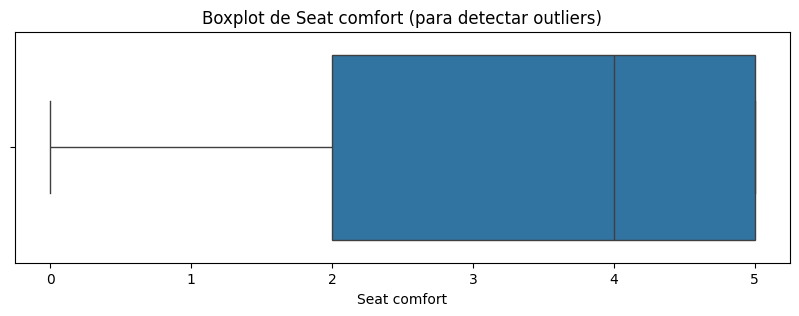

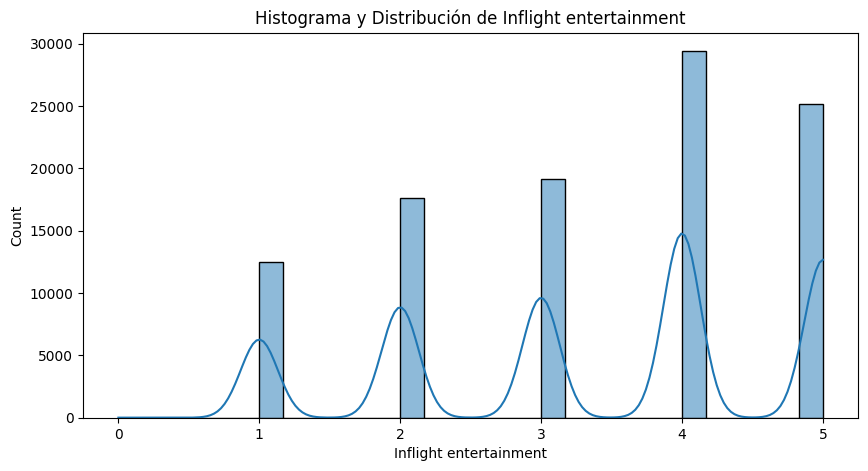

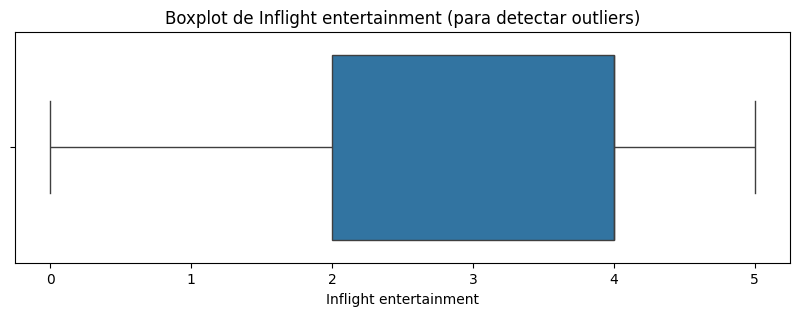

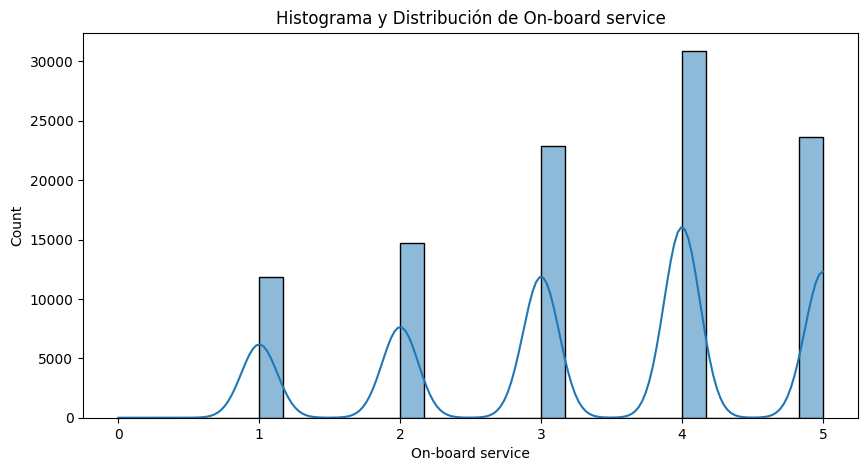

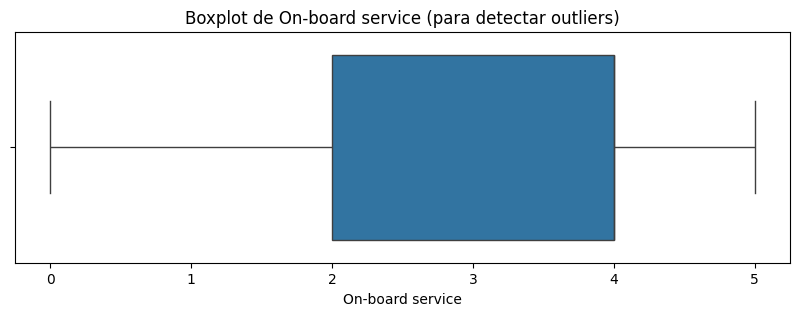

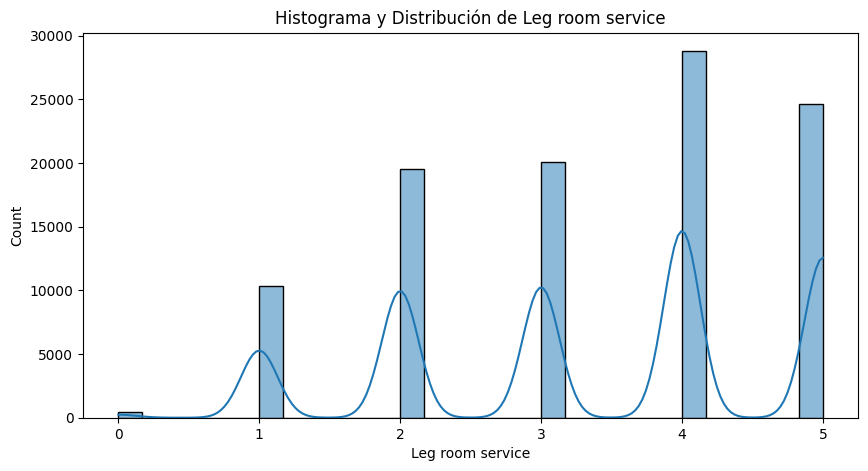

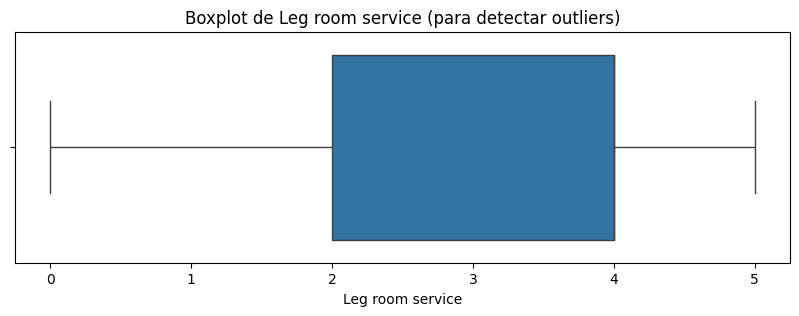

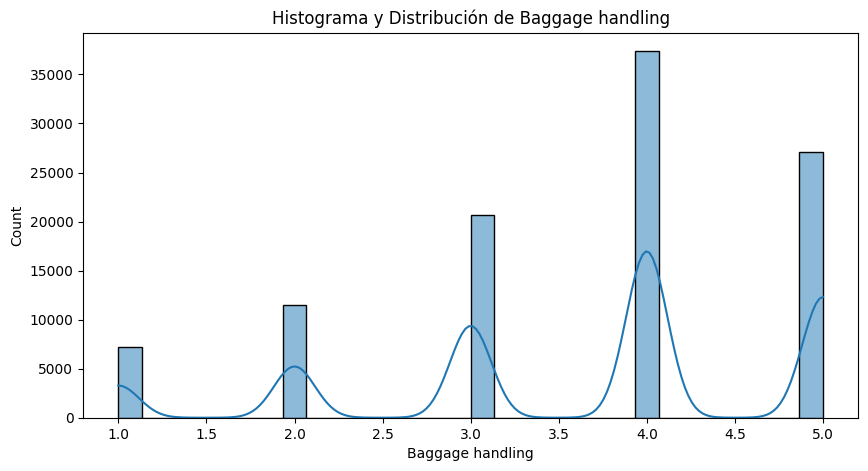

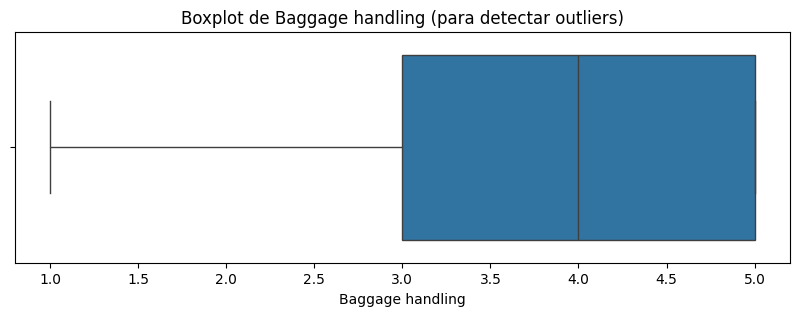

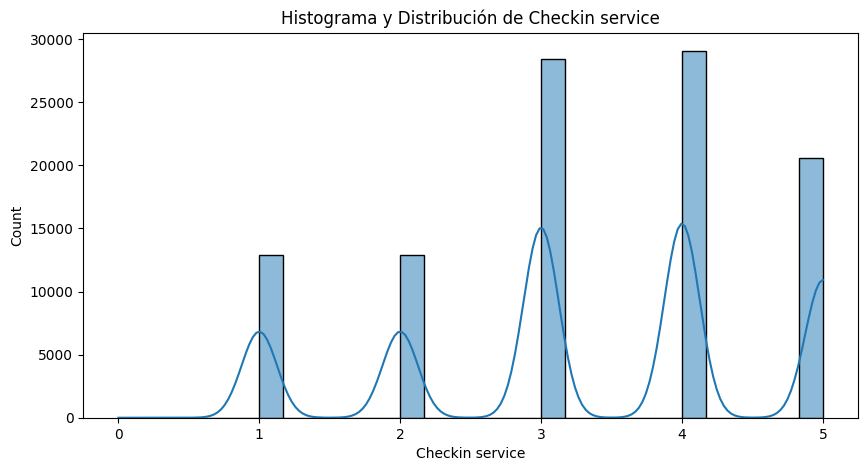

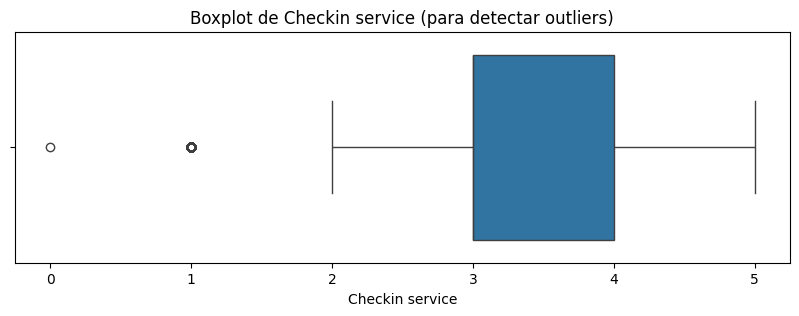

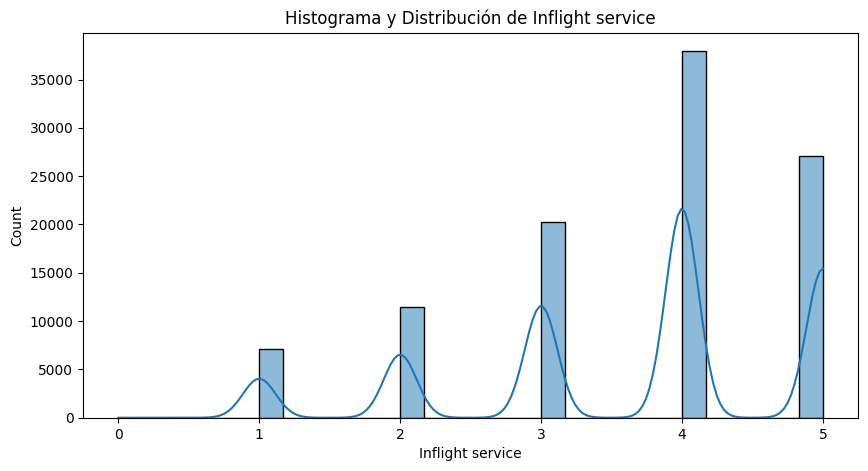

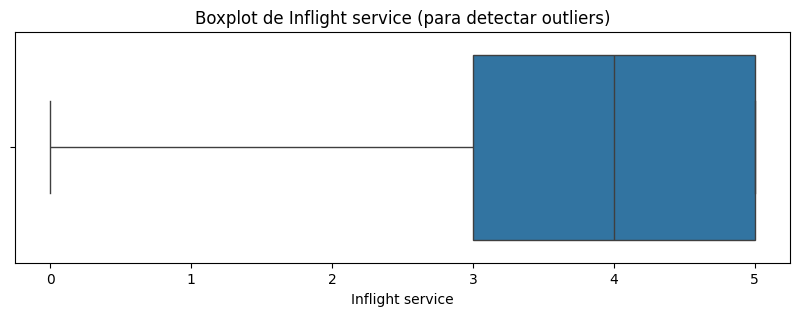

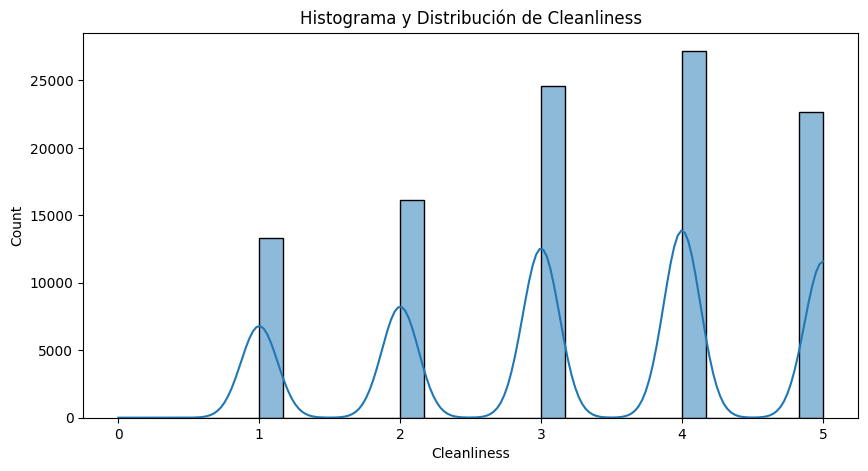

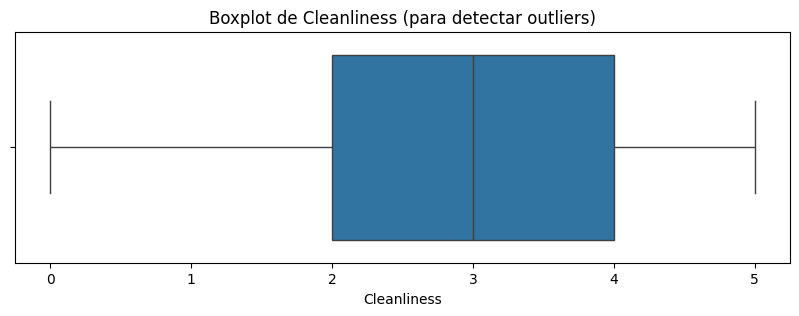

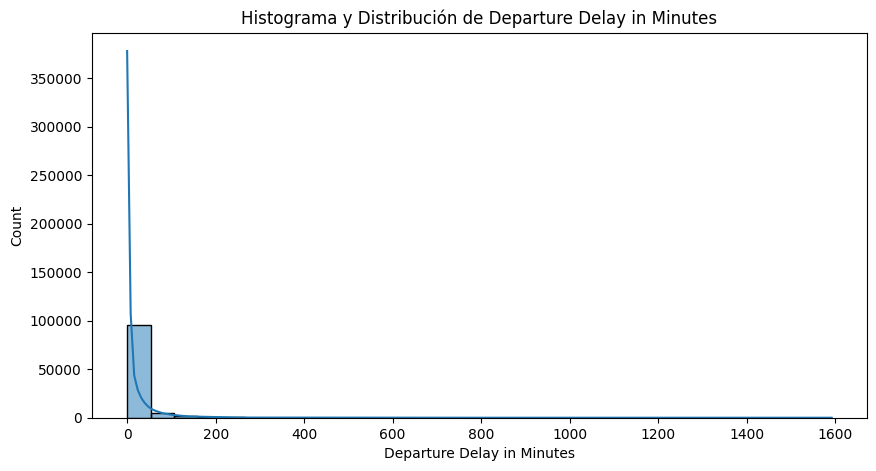

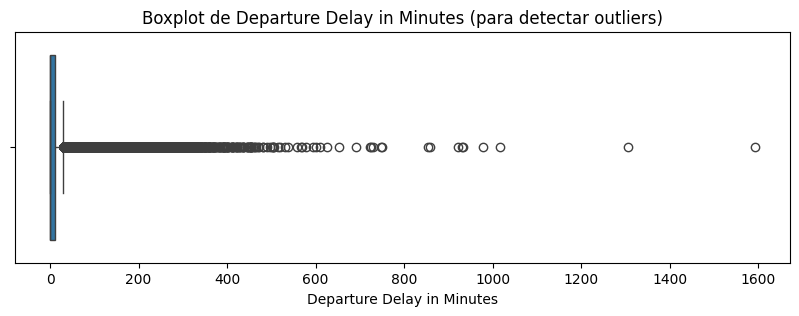

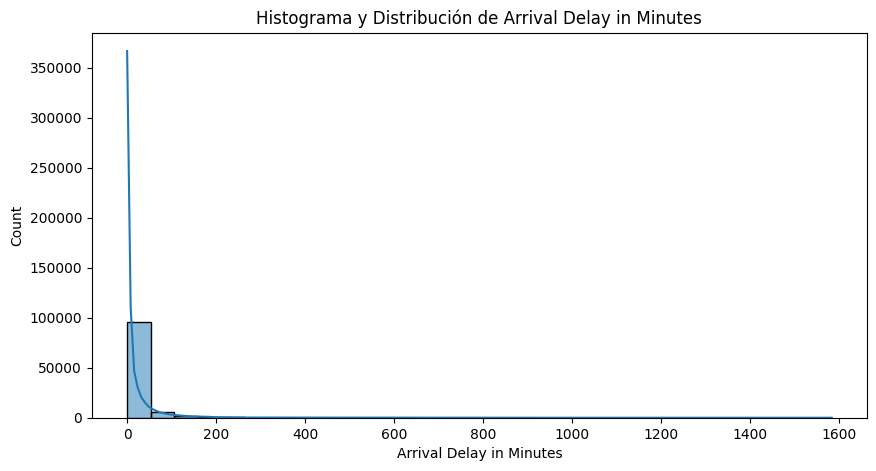

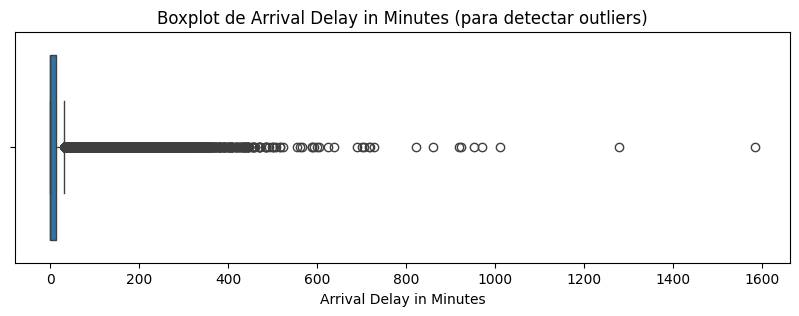

In [19]:
numeric_cols = df.select_dtypes(include=np.number).columns

for col in numeric_cols:
    plt.figure(figsize=(10, 5))

    # Histograma para ver la distribución
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Histograma y Distribución de {col}')
    plt.show()

    # Boxplot para detectar valores atípicos
    plt.figure(figsize=(10, 3))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col} (para detectar outliers)')
    plt.show()

## Correlación entre variables

In [20]:
#Convierto satisfaction en numerico
df['satisfaction'] = df['satisfaction'].map({'satisfied': 1, 'neutral or dissatisfied': 0})

In [21]:
# --- Convierte las columnas 'object' a 'category' ---
columnas_categoricas = df.select_dtypes(include=['object']).columns
for col in columnas_categoricas:
    df[col] = df[col].astype('category')

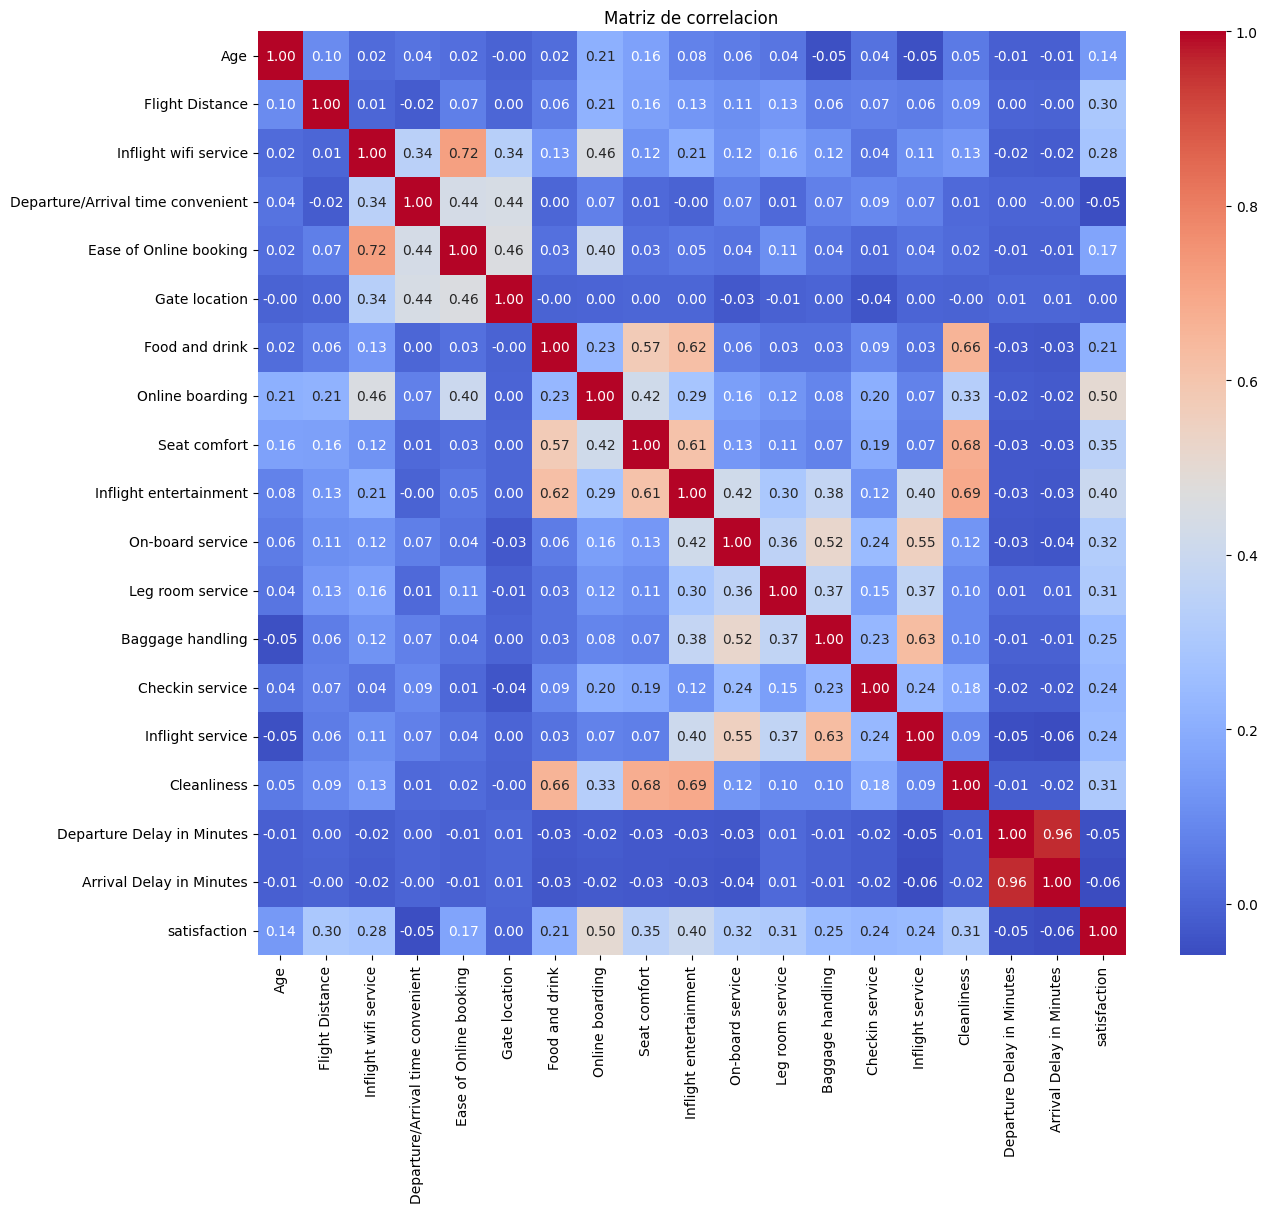

In [22]:
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(14,12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlacion')
plt.show()

## Entrenando modelos

In [23]:
from sklearn.model_selection import train_test_split

# Separar variables predictoras (X) de la variable objetivo (y)
X = df.drop('satisfaction', axis=1)
y = df['satisfaction']

# Dividir los datos
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Tamaño del conjunto de entrenamiento: {len(X_train)}")
print(f"Tamaño del conjunto de validación: {len(X_val)}")

Tamaño del conjunto de entrenamiento: 83123
Tamaño del conjunto de validación: 20781


### XGBoost

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from xgboost import XGBClassifier
# Definir la función de tu profesor
def my_XGB_report(X_train, y_train, X_test, y_test, model=None):
    # Entrenar modelo si no se pasa uno ya entrenado
    if model is None:
        model = XGBClassifier(
            random_state=42,
            use_label_encoder=False,
            eval_metric='logloss',
            enable_categorical=True
        )
        model.fit(X_train, y_train)

    # Predicciones
    y_hat = model.predict(X_test)

    # Métricas
    cm = confusion_matrix(y_test, y_hat)
    accuracy = round(accuracy_score(y_test, y_hat), 4)
    error_rate = round(1 - accuracy, 4)
    precision = round(precision_score(y_test, y_hat), 2)
    recall = round(recall_score(y_test, y_hat), 2)
    f1score = round(f1_score(y_test, y_hat), 2)

    cm_labeled = pd.DataFrame(cm,
                              index=['Actual : negativos', 'Actual : positivos'],
                              columns=['Predicción : negativos', 'Predicción : positivos'])

    # Reporte
    print("-----------------------------------------")
    print("Dataset")
    print('Tamaño train: {}'.format(X_train.shape[0]))
    print('Tamaño test: {}'.format(X_test.shape[0]))
    print('Porcentaje de positivos: {:.2f}%'.format(100 * np.sum(y_train) / np.size(y_train)))
    print("-----------------------------------------")
    print("Resultados")
    print('Accuracy  = {}'.format(accuracy))
    print('Error_rate  = {}'.format(error_rate))
    print('Precision = {}'.format(precision))
    print('Recall    = {}'.format(recall))
    print('f1_score  = {}'.format(f1score))
    print("-----------------------------------------")

    return cm_labeled

In [25]:
# Llamar a la función XGBoost
cm_report = my_XGB_report(X_train, y_train, X_val, y_val)
print("Matriz de Confusión:")
print(cm_report)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [16:37:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


-----------------------------------------
Dataset
Tamaño train: 83123
Tamaño test: 20781
Porcentaje de positivos: 43.26%
-----------------------------------------
Resultados
Accuracy  = 0.9631
Error_rate  = 0.0369
Precision = 0.97
Recall    = 0.94
f1_score  = 0.96
-----------------------------------------
Matriz de Confusión:
                    Predicción : negativos  Predicción : positivos
Actual : negativos                   11468                     245
Actual : positivos                     522                    8546


Iniciando la búsqueda de hiperparámetros...
Fitting 3 folds for each of 48 candidates, totalling 144 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [16:40:20] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Mejores hiperparámetros encontrados:
{'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
----------------------------------------
Generando reporte para el modelo optimizado...
-----------------------------------------
Dataset
Tamaño train: 83123
Tamaño test: 20781
Porcentaje de positivos: 43.26%
-----------------------------------------
Resultados
Accuracy  = 0.9637
Error_rate  = 0.0363
Precision = 0.97
Recall    = 0.94
f1_score  = 0.96
-----------------------------------------
Matriz de Confusión (Optimizada):
                    Predicción : negativos  Predicción : positivos
Actual : negativos                   11481                     232
Actual : positivos                     523                    8545


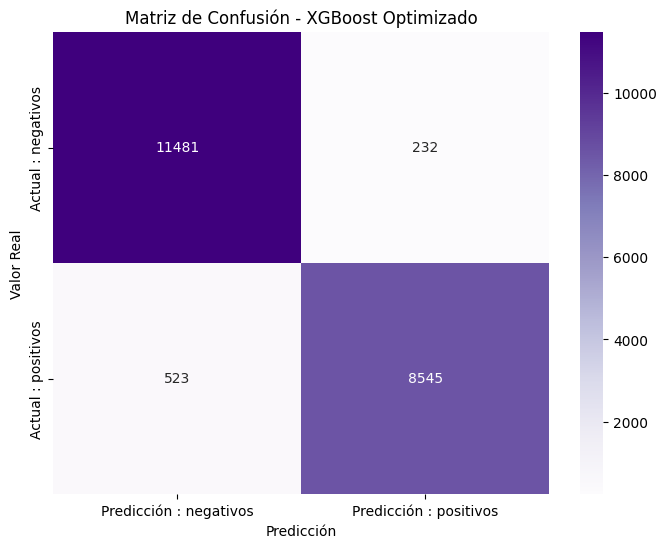

In [26]:
from sklearn.model_selection import GridSearchCV
# --- Búsqueda de Hiperparámetros ---
print("Iniciando la búsqueda de hiperparámetros...")
# Grid de hiperparámetros para XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Instanciamos el clasificador base
xgb = XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss',
    enable_categorical=True
)

# GridSearchCV
grid_search_xgb = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid_xgb,
    cv=3,
    scoring='f1',
    verbose=2,
    n_jobs=-1
)

# Entrenamiento con los datos de entrenamiento para la búsqueda
grid_search_xgb.fit(X_train, y_train)

# Mejor modelo encontrado
best_xgb_model = grid_search_xgb.best_estimator_

print("\nMejores hiperparámetros encontrados:")
print(grid_search_xgb.best_params_)
print("-" * 40)

# --- Reporte del Modelo Optimizado ---
print("Generando reporte para el modelo optimizado...")
cm_xgb_tuned = my_XGB_report(X_train, y_train, X_val, y_val, model=best_xgb_model)
print("Matriz de Confusión (Optimizada):")
print(cm_xgb_tuned)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb_tuned, annot=True, cmap="Purples", fmt='d', xticklabels=['Predicción : negativos', 'Predicción : positivos'], yticklabels=['Actual : negativos', 'Actual : positivos'])
plt.title("Matriz de Confusión - XGBoost Optimizado")
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.show()

### LightGBM

In [27]:
from lightgbm import LGBMClassifier

def my_LGBM_report(X_train, y_train, X_test, y_test, model=None):
    if model is None:
        model = LGBMClassifier(
            random_state=42,
            verbose=-1  # 'verbose=-1' desactiva la impresión de resultados del modelo durante el entrenamiento
        )
        model.fit(X_train, y_train)

    y_hat = model.predict(X_test)

    cm = confusion_matrix(y_test, y_hat)
    accuracy = round(accuracy_score(y_test, y_hat), 4)
    error_rate = round(1 - accuracy, 4)
    precision = round(precision_score(y_test, y_hat), 2)
    recall = round(recall_score(y_test, y_hat), 2)
    f1score = round(f1_score(y_test, y_hat), 2)

    cm_labeled = pd.DataFrame(cm,
                              index=['Actual : negativos', 'Actual : positivos'],
                              columns=['Predicción : negativos', 'Predicción : positivos'])

    print("-----------------------------------------")
    print("Dataset")
    print('Tamaño train: {}'.format(X_train.shape[0]))
    print('Tamaño test: {}'.format(X_test.shape[0]))
    print('Porcentaje de positivos: {:.2f}%'.format(100 * np.sum(y_train) / np.size(y_train)))
    print("-----------------------------------------")
    print("Resultados")
    print('Accuracy  = {}'.format(accuracy))
    print('Error_rate  = {}'.format(error_rate))
    print('Precision = {}'.format(precision))
    print('Recall    = {}'.format(recall))
    print('f1_score  = {}'.format(f1score))
    print("-----------------------------------------")

    return cm_labeled

In [28]:
# Llamar a la función LightGBM
cm_report = my_LGBM_report(X_train, y_train, X_val, y_val)
print("Matriz de Confusión:")
print(cm_report)

-----------------------------------------
Dataset
Tamaño train: 83123
Tamaño test: 20781
Porcentaje de positivos: 43.26%
-----------------------------------------
Resultados
Accuracy  = 0.9638
Error_rate  = 0.0362
Precision = 0.97
Recall    = 0.94
f1_score  = 0.96
-----------------------------------------
Matriz de Confusión:
                    Predicción : negativos  Predicción : positivos
Actual : negativos                   11493                     220
Actual : positivos                     532                    8536


Iniciando la búsqueda de hiperparámetros para LightGBM...
Fitting 3 folds for each of 48 candidates, totalling 144 fits

Mejores hiperparámetros encontrados:
{'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
----------------------------------------
Generando reporte para el modelo optimizado de LightGBM...
-----------------------------------------
Dataset
Tamaño train: 83123
Tamaño test: 20781
Porcentaje de positivos: 43.26%
-----------------------------------------
Resultados
Accuracy  = 0.9631
Error_rate  = 0.0369
Precision = 0.97
Recall    = 0.94
f1_score  = 0.96
-----------------------------------------
Matriz de Confusión (Optimizada LightGBM):
                    Predicción : negativos  Predicción : positivos
Actual : negativos                   11477                     236
Actual : positivos                     531                    8537


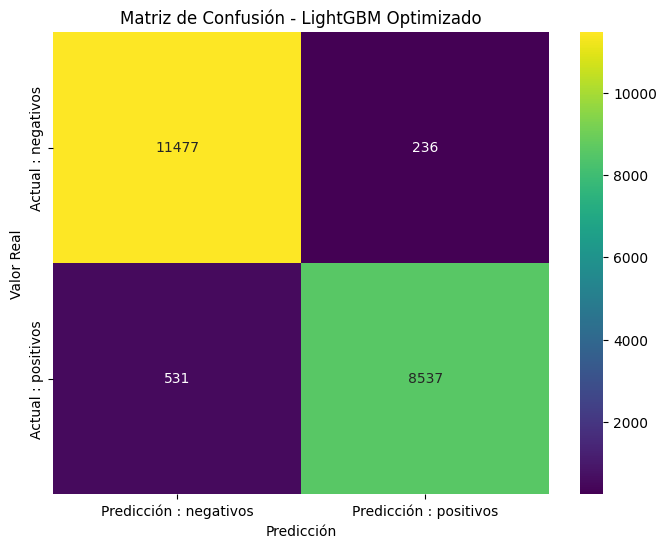

In [29]:
# --- Búsqueda de Hiperparámetros con GridSearchCV ---
print("Iniciando la búsqueda de hiperparámetros para LightGBM...")

# Grid de hiperparámetros para LightGBM
param_grid_lgbm = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Instanciamos el clasificador base
lgbm = LGBMClassifier(random_state=42, verbose=-1)

# GridSearchCV
grid_search_lgbm = GridSearchCV(
    estimator=lgbm,
    param_grid=param_grid_lgbm,
    cv=3,
    scoring='f1',
    verbose=2,
    n_jobs=-1
)

# Entrenamiento con los datos de entrenamiento para la búsqueda
grid_search_lgbm.fit(X_train, y_train)

# Mejor modelo encontrado
best_lgbm_model = grid_search_lgbm.best_estimator_

print("\nMejores hiperparámetros encontrados:")
print(grid_search_lgbm.best_params_)
print("-" * 40)

# --- Reporte del Modelo Optimizado ---
print("Generando reporte para el modelo optimizado de LightGBM...")
cm_lgbm_tuned = my_LGBM_report(X_train, y_train, X_val, y_val, model=best_lgbm_model)
print("Matriz de Confusión (Optimizada LightGBM):")
print(cm_lgbm_tuned)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lgbm_tuned, annot=True, cmap="viridis", fmt='d', xticklabels=['Predicción : negativos', 'Predicción : positivos'], yticklabels=['Actual : negativos', 'Actual : positivos'])
plt.title("Matriz de Confusión - LightGBM Optimizado")
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.show()

### Random Forest

In [30]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def my_rf_report(X_train, y_train, X_test, y_test, model):
    """Genera el reporte de métricas detallado para un clasificador ya entrenado."""

    # Predicciones
    y_hat = model.predict(X_test)

    # Métricas
    cm = confusion_matrix(y_test, y_hat)
    accuracy = round(accuracy_score(y_test, y_hat), 4)
    error_rate = round(1 - accuracy, 4)
    precision = round(precision_score(y_test, y_hat), 2)
    recall = round(recall_score(y_test, y_hat), 2)
    f1score = round(f1_score(y_test, y_hat), 2)

    cm_labeled = pd.DataFrame(cm,
                              index=['Actual : negativos', 'Actual : positivos'],
                              columns=['Predicción : negativos', 'Predicción : positivos'])

    # Reporte
    print("-----------------------------------------")
    print("Dataset")
    print(f'Tamaño TRAIN: {X_train.shape[0]}')
    print(f'Tamaño TEST: {X_test.shape[0]}')
    print('Porcentaje de positivos (TRAIN): {:.2f}%'.format(100 * np.sum(y_train) / np.size(y_train)))
    print("-----------------------------------------")
    print("Resultados")
    print(f'Accuracy  = {accuracy}')
    print(f'Error_rate  = {error_rate}')
    print(f'Precision = {precision}')
    print(f'Recall    = {recall}')
    print(f'f1_score  = {f1score}')
    print("-----------------------------------------")

    return cm_labeled

In [31]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Las columnas categóricas son las de tipo 'category' que se definieron para XGBoost/LightGBM
columnas_categoricas = X_train.select_dtypes(include=['category']).columns

# Crear el pre-procesador para las columnas categóricas
preprocessor = ColumnTransformer(
    transformers=[('onehot', OneHotEncoder(handle_unknown='ignore'), columnas_categoricas)],
    remainder='passthrough'
)

# Aplicar las transformaciones a los conjuntos de entrenamiento y validación
X_train_transformed = preprocessor.fit_transform(X_train)
X_val_transformed = preprocessor.transform(X_val)


--- Random Forest ---
Precisión: 0.9630


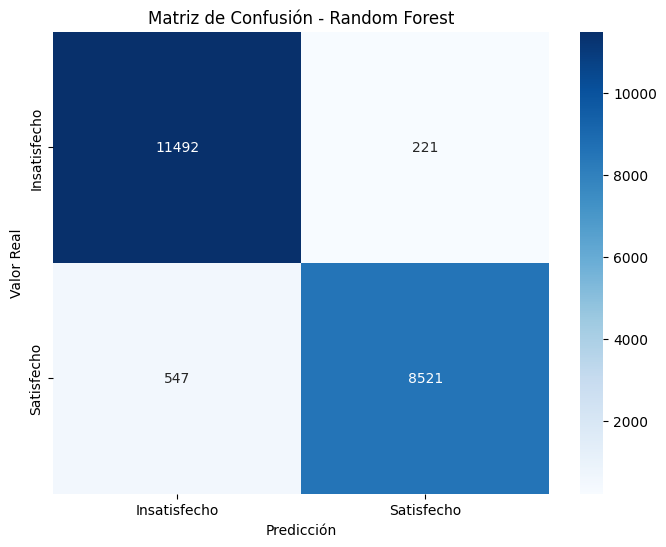

In [32]:
from sklearn.ensemble import RandomForestClassifier

# Entrenar el modelo Random Forest
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train_transformed, y_train)

# Predecir en el conjunto de validación
y_pred_rf = model_rf.predict(X_val_transformed)

# Evaluar el modelo
print("\n--- Random Forest ---")
print(f"Precisión: {accuracy_score(y_val, y_pred_rf):.4f}")

# Mostrar matriz de confusión
cm_rf = confusion_matrix(y_val, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Insatisfecho', 'Satisfecho'], yticklabels=['Insatisfecho', 'Satisfecho'])
plt.title('Matriz de Confusión - Random Forest')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

Iniciando la búsqueda de hiperparámetros para Random Forest...
Fitting 2 folds for each of 16 candidates, totalling 32 fits


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(



Mejores hiperparámetros encontrados para Random Forest:
{'max_depth': 25, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
----------------------------------------
Generando reporte para el modelo optimizado de Random Forest...
-----------------------------------------
Dataset
Tamaño TRAIN: 83123
Tamaño TEST: 20781
Porcentaje de positivos (TRAIN): 43.26%
-----------------------------------------
Resultados
Accuracy  = 0.963
Error_rate  = 0.037
Precision = 0.97
Recall    = 0.94
f1_score  = 0.96
-----------------------------------------
Matriz de Confusión (Optimizada Random Forest):
                    Predicción : negativos  Predicción : positivos
Actual : negativos                   11481                     232
Actual : positivos                     536                    8532


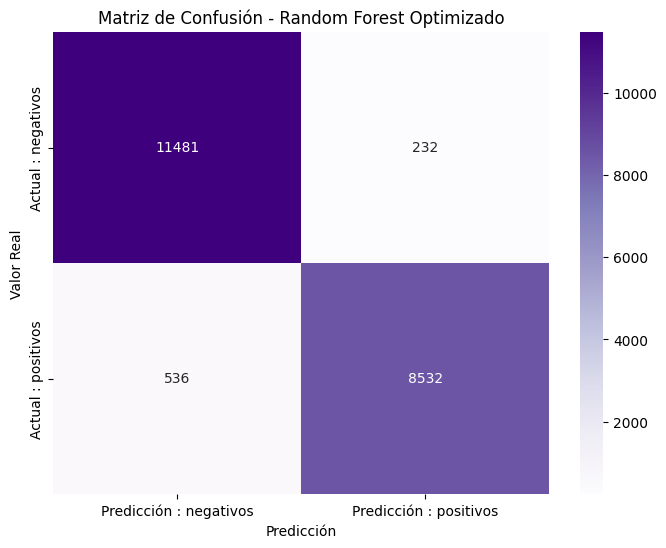

In [33]:
print("Iniciando la búsqueda de hiperparámetros para Random Forest...")

# Grid de hiperparámetros para Random Forest
# Elegimos parámetros comunes para Random Forest
param_grid_rf = {
    'n_estimators': [100, 200],      # Número de árboles
    'max_depth': [15, 25],     # Profundidad máxima del árbol (None = sin límite)
    'min_samples_split': [2, 5],     # Mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 2]       # Mínimo de muestras en un nodo hoja
}

# Instanciamos el clasificador base
# Usamos n_jobs=-1 para paralelizar el entrenamiento y acelerarlo
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

# GridSearchCV
# cv=3: Cross-validation de 3 pliegues.
# scoring='f1': Usamos F1-score como métrica de optimización.
grid_search_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_rf,
    cv=2,
    scoring='f1',
    verbose=2,
    n_jobs=-1
)

# Entrenamiento con los datos transformados (One-Hot Encoded)
# ¡IMPORTANTE! Usar las versiones transformadas para RF
grid_search_rf.fit(X_train_transformed, y_train)

# Mejor modelo encontrado
best_rf_model = grid_search_rf.best_estimator_

print("\nMejores hiperparámetros encontrados para Random Forest:")
BEST_RF_PARAMS = grid_search_rf.best_params_
print(BEST_RF_PARAMS)
print("-" * 40)

# --- Reporte del Modelo Optimizado ---
print("Generando reporte para el modelo optimizado de Random Forest...")

# Nota: La función my_report asume que X_train, X_test son los que usaste para entrenar/testear
cm_rf_tuned = my_rf_report(X_train_transformed, y_train, X_val_transformed, y_val, model=best_rf_model)
print("Matriz de Confusión (Optimizada Random Forest):")
print(cm_rf_tuned)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf_tuned, annot=True, cmap="Purples", fmt='d', xticklabels=['Predicción : negativos', 'Predicción : positivos'], yticklabels=['Actual : negativos', 'Actual : positivos'])
plt.title('Matriz de Confusión - Random Forest Optimizado')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

## Entrenamiento Final

In [34]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# --- Función de Reporte (Basada en la que proporcionaste) ---
def my_report(X_train, y_train, X_test, y_test, model):
    """Genera el reporte de métricas para cualquier clasificador."""

    # Asume que el modelo ya está entrenado, solo predice.
    y_hat = model.predict(X_test)

    # Métricas
    cm = confusion_matrix(y_test, y_hat)
    accuracy = round(accuracy_score(y_test, y_hat), 4)
    error_rate = round(1 - accuracy, 4)
    precision = round(precision_score(y_test, y_hat), 2)
    recall = round(recall_score(y_test, y_hat), 2)
    f1score = round(f1_score(y_test, y_hat), 2)

    cm_labeled = pd.DataFrame(cm,
                              index=['Actual : negativos', 'Actual : positivos'],
                              columns=['Predicción : negativos', 'Predicción : positivos'])

    # Reporte
    print("-----------------------------------------")
    print("Dataset")
    print(f'Tamaño TRAIN: {X_train.shape[0]}')
    print(f'Tamaño TEST: {X_test.shape[0]}')
    print('Porcentaje de positivos (TRAIN): {:.2f}%'.format(100 * np.sum(y_train) / np.size(y_train)))
    print("-----------------------------------------")
    print("Resultados")
    print(f'Accuracy  = {accuracy}')
    print(f'Error_rate  = {error_rate}')
    print(f'Precision = {precision}')
    print(f'Recall    = {recall}')
    print(f'f1_score  = {f1score}')
    print("-----------------------------------------")

    return cm_labeled

# --- Carga y Pre-procesamiento Inicial ---

# Cargar y pre-procesar datos de entrenamiento (100% del set original)
df_train = pd.read_csv('train.csv')
median_delay_train = df_train['Arrival Delay in Minutes'].median()
df_train['Arrival Delay in Minutes'].fillna(median_delay_train, inplace=True)
columnas_eliminar = ['Unnamed: 0', 'id']
df_train.drop(columns=columnas_eliminar, inplace=True)
df_train['satisfaction'] = df_train['satisfaction'].map({'satisfied': 1, 'neutral or dissatisfied': 0})

X = df_train.drop('satisfaction', axis=1)
y = df_train['satisfaction']

# Cargar y pre-procesar datos de testeo
df_test = pd.read_csv('test.csv')
# Usar la mediana del set de ENTRENAMIENTO para imputar en TEST
df_test['Arrival Delay in Minutes'].fillna(median_delay_train, inplace=True)
df_test.drop(columns=columnas_eliminar, inplace=True)
df_test['satisfaction'] = df_test['satisfaction'].map({'satisfied': 1, 'neutral or dissatisfied': 0})

X_test = df_test.drop('satisfaction', axis=1)
y_test = df_test['satisfaction']


# --- Conversión a Categoría (Necesario para XGBoost y LightGBM nativo) ---

# Identificar columnas categóricas
columnas_categoricas = X.select_dtypes(include=['object']).columns

# Aplicar la conversión a ambos conjuntos
for col in columnas_categoricas:
    X[col] = X[col].astype('category')
    X_test[col] = X_test[col].astype('category')

print(f"Datos listos. Tamaño total de Entrenamiento: {len(X)}. Tamaño de Testeo: {len(X_test)}")

Datos listos. Tamaño total de Entrenamiento: 103904. Tamaño de Testeo: 25976


/tmp/ipython-input-22219391.py:53: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Arrival Delay in Minutes'].fillna(median_delay_train, inplace=True)
/tmp/ipython-input-22219391.py:64: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(va

In [35]:
# --- Codificación One-Hot para Random Forest ---

# Crear el pre-procesador (solo aplica OHE a las columnas categóricas)
# 'columnas_categoricas' ya está definida en el bloque anterior
preprocessor_rf = ColumnTransformer(
    transformers=[('onehot', OneHotEncoder(handle_unknown='ignore'), columnas_categoricas)],
    remainder='passthrough'
)

# Aplicar las transformaciones:
# 1. Ajustar el transformador a los datos de entrenamiento (X)
# 2. Transformar los datos de entrenamiento y de testeo
X_transformed_rf = preprocessor_rf.fit_transform(X)
X_test_transformed_rf = preprocessor_rf.transform(X_test)

print("Datos transformados (One-Hot) listos para Random Forest.")
print(f"Forma de X transformado: {X_transformed_rf.shape}")

Datos transformados (One-Hot) listos para Random Forest.
Forma de X transformado: (103904, 27)


In [36]:
# --- Parámetros Placeholder (AJUSTA ESTOS VALORES) ---
# Usa los mejores parámetros que encontraste en tu búsqueda anterior
BEST_XGB_PARAMS = grid_search_xgb.best_params_
BEST_LGBM_PARAMS = grid_search_lgbm.best_params_
BEST_RF_PARAMS = grid_search_rf.best_params_


# --- MODELO 1: XGBoost Final ---
print("\n=== EVALUACIÓN FINAL: XGBoost ===")
final_xgb_model = XGBClassifier(
    **BEST_XGB_PARAMS,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss',
    enable_categorical=True # Habilita el manejo nativo de categorías
)

# Entrenar con X, y (100% de los datos de entrenamiento)
final_xgb_model.fit(X, y)

# Testear en X_test, y_test
cm_xgb_final = my_report(X, y, X_test, y_test, model=final_xgb_model)
print("Matriz de Confusión Final (XGBoost):")
print(cm_xgb_final)


# --- MODELO 2: LightGBM Final ---
print("\n=== EVALUACIÓN FINAL: LightGBM ===")
final_lgbm_model = LGBMClassifier(
    **BEST_LGBM_PARAMS,
    random_state=42,
    verbose=-1 # Desactiva los mensajes de entrenamiento
)

# Entrenar con X, y (100% de los datos de entrenamiento)
final_lgbm_model.fit(X, y)

# Testear en X_test, y_test
cm_lgbm_final = my_report(X, y, X_test, y_test, model=final_lgbm_model)
print("Matriz de Confusión Final (LightGBM):")
print(cm_lgbm_final)


# --- MODELO 3: Random Forest Final ---
print("\n=== EVALUACIÓN FINAL: Random Forest ===")
final_rf_model = RandomForestClassifier(
    **BEST_RF_PARAMS,
    random_state=42,
    n_jobs=-1
)

# Entrenar con X_transformed_rf, y (100% de los datos de entrenamiento OHE)
final_rf_model.fit(X_transformed_rf, y)

# Testear en X_test_transformed_rf, y_test
cm_rf_final = my_report(X_transformed_rf, y, X_test_transformed_rf, y_test, model=final_rf_model)
print("Matriz de Confusión Final (Random Forest):")
print(cm_rf_final)


=== EVALUACIÓN FINAL: XGBoost ===


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [16:46:53] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


-----------------------------------------
Dataset
Tamaño TRAIN: 103904
Tamaño TEST: 25976
Porcentaje de positivos (TRAIN): 43.33%
-----------------------------------------
Resultados
Accuracy  = 0.9644
Error_rate  = 0.0356
Precision = 0.97
Recall    = 0.94
f1_score  = 0.96
-----------------------------------------
Matriz de Confusión Final (XGBoost):
                    Predicción : negativos  Predicción : positivos
Actual : negativos                   14280                     293
Actual : positivos                     631                   10772

=== EVALUACIÓN FINAL: LightGBM ===
-----------------------------------------
Dataset
Tamaño TRAIN: 103904
Tamaño TEST: 25976
Porcentaje de positivos (TRAIN): 43.33%
-----------------------------------------
Resultados
Accuracy  = 0.9645
Error_rate  = 0.0355
Precision = 0.97
Recall    = 0.94
f1_score  = 0.96
-----------------------------------------
Matriz de Confusión Final (LightGBM):
                    Predicción : negativos  Predicción :


Iniciando cálculo de valores SHAP para LightGBM...


/usr/local/lib/python3.12/dist-packages/shap/explainers/_tree.py:583: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


Cálculo SHAP finalizado.

Generando Gráfico Resumen SHAP (Summary Plot)...


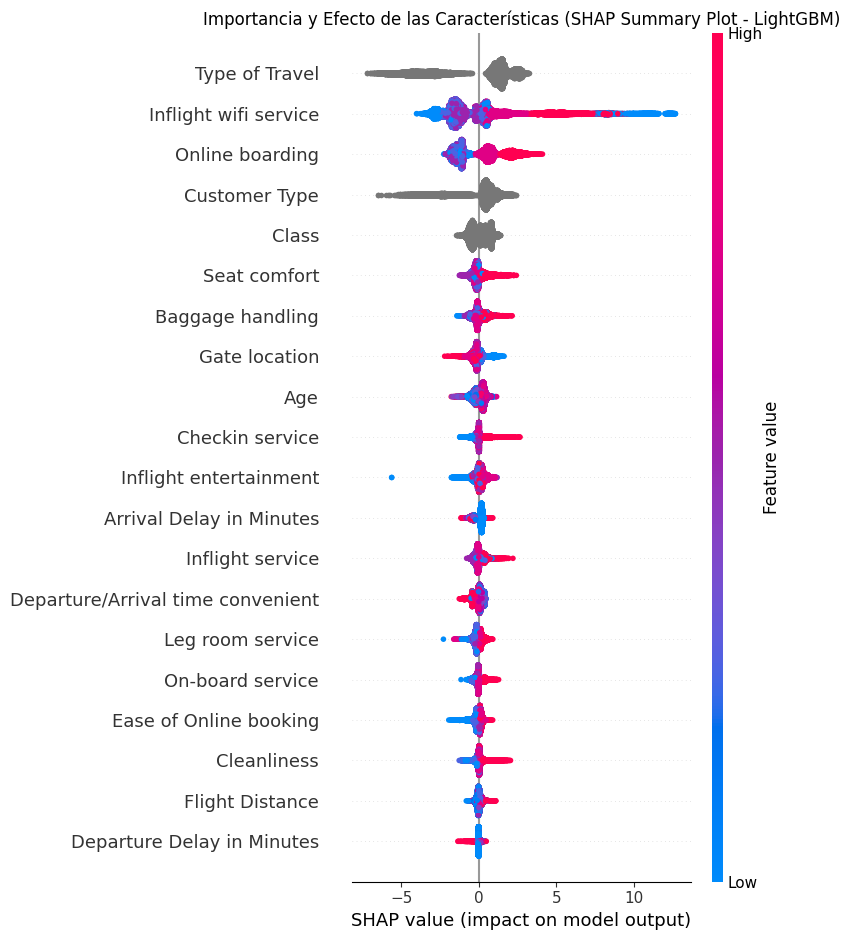

In [44]:
import shap

# --- 1. Inicializar el Explainer de SHAP ---
# Usamos el Explainer de Tree (TreeExplainer) porque LightGBM es un modelo basado en árboles.
# Le pasamos el modelo FINAL entrenado.

explainer_lgbm = shap.TreeExplainer(final_lgbm_model)

# --- 2. Calcular los valores SHAP ---
# Calculamos los valores SHAP usando el conjunto de testeo (X_test)
# Esto nos da la explicación de las predicciones del modelo en datos que nunca ha visto.
# La conversión a valores de SHAP puede tardar un poco.

print("\nIniciando cálculo de valores SHAP para LightGBM...")
shap_values_lgbm = explainer_lgbm.shap_values(X_test)
print("Cálculo SHAP finalizado.")
# --- 3. Visualización 1: Gráfico Resumen (Summary Plot) ---
# Este gráfico es el más importante. Muestra la importancia de las características
# (eje Y) y el impacto (eje X) que tienen en la predicción.
# El color indica el valor de la característica (rojo = alto, azul = bajo).

print("\nGenerando Gráfico Resumen SHAP (Summary Plot)...")

plt.title("Importancia y Efecto de las Características (SHAP Summary Plot - LightGBM)")

shap.summary_plot(shap_values_lgbm, X_test, plot_type="dot", show=False)
plt.tight_layout()
plt.show()